#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the Dataset and Preprocessing

In [ ]:
df = pd.read_csv('advertising_sales_data.csv')
df.head()

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9


In [ ]:
#checking the data types of each feature
df.dtypes

,0
Campaign,object
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [ ]:
#checking if there are null values
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


We can see that the Radio sales feature has 2 null data points

In [ ]:
#replacing the rows with null values with the average value
mean_value = df['Radio'].mean()
print(mean_value)


23.26060606060606


In [ ]:
df['Radio'].fillna(mean_value, inplace=True)

<ipython-input-6-fe0548319c08>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Radio'].fillna(mean_value, inplace=True)


In [ ]:
print(df.isnull().sum())

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


Now we can see that there are no null values in the dataset

#1. Average amount spent on TV advertising in the dataset

In [ ]:
tv_avg = df['TV'].mean()
print(tv_avg)

147.0425


**Analysis**

$147.0425 was spent on TV Advertising on an average

#2. Correlation between radio advertising expenditure and product sales

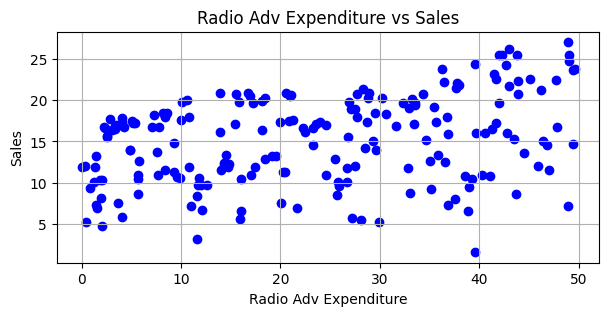

In [ ]:
plt.figure(figsize=(7,3))
plt.scatter(df['Radio'].values, df['Sales'].values, color='b')
plt.title('Radio Adv Expenditure vs Sales')
plt.xlabel('Radio Adv Expenditure')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

The scatter plots suggests a relationship that is not exactly linear, but somewhat monotonic. Hence, using Spearman's Correlation is the best.

In [ ]:
correlation = df['Radio'].corr(df['Sales'], method="spearman")
print("Correlation between Radio advertising and Sales:", correlation)

Correlation between Radio advertising and Sales: 0.3400171019567945


**Analysis**

The correlation between Radio Advertising Expenditure and Sales is 0.34001

This indicates that there is a positive relationship between the two features, but it is weak or not very consistent, i.e., an increase in Radio Advertising Expenditure might lead to a slight increase in sales, but it might not increase by a huge margin in a consistent manner

#3. Advertising medium that has the highest impact on sales

In [ ]:
correlations = df[['TV', 'Radio', 'Newspaper']].corrwith(df['Sales'], method='spearman')
print(correlations)

TV           0.900996
Radio        0.340017
Newspaper    0.123027
dtype: float64


**Analysis**

It can be seen that advertising via TV has the highest impact on sales. Thus, it can be understood that people are most influenced by TV advertisements and hence sellers can strategize accordingly to boost their sales.

#4. Plotting a Linear Regression Line to predict Sales and visualize the model's predictions against actual values

Splitting the dataset

In [ ]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

Splitting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Train a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

Visualize the regression line for the training set

Mean Squared Error: 2.9074318865000572
R-squared: 0.9059117026092903


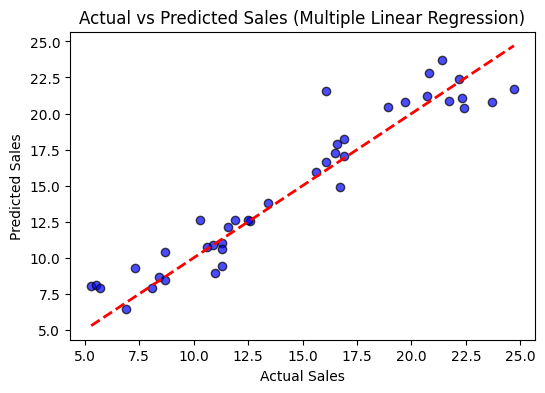

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs. predicted sales values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Multiple Linear Regression)')
plt.show()


**Analysis**

Most of the data points in the Actual vs Predicted plot are scattered around the regression line, showing that the model is fairly accurate.

However, deviations increase as the Actual Sales value increases. This might imply that the model's accuracy decreases with an increase in the Actual Sales value.

Therefore, the model displays decent performance at lower and intermediate values of Actual Sales but needs improvement at higher levels.



#5. Prediction for a new set of Advertising Expenditures

In [ ]:
# TV = $200, Radio = $40, Newspaper = $50
new_data = [[200, 40, 50]]

# Predict the sales for the new data
predicted_sales = regressor.predict(new_data)

print(f"Predicted Sales: {predicted_sales[0]:.2f}")
#print("Predicted Sales:", predicted_sales)

Predicted Sales: 19.73


**Analysis**

The predicted value of sales for the given expenditure across different advertising mediums is $19.73.



#6. Performance of the linear regression model when the dataset is normalized

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model on normalized data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Normalized): {mse}")
print(f"R-squared (Normalized): {r2}")


Mean Squared Error (Normalized): 2.9074318865000572
R-squared (Normalized): 0.9059117026092903


**Analysis**

The value of Mean Squared Error and R-squared error of the model increases from 2.409 and 0.874 respectively, without normalization, to 2.907 and 0.905 respectively, with normalization.

Normalization results in the scaling of all features in the dataset. This might lead to skewed results post normalization, since scaling some features might have an adverse effect on the overall performance.

Another reason for the slight increase can be the linear relationships among the features, which get distorted after normalization.

#7. Impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors

In [ ]:
X_reduced = df[['Radio', 'Newspaper']]
y = df['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the model
model_reduced = LinearRegression()
model_reduced.fit(X_train, y_train)

# Predict and evaluate
y_pred_reduced = model_reduced.predict(X_test)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Mean Squared Error without TV: {mse_reduced}")
print(f"R-squared without TV: {r2_reduced}")

Mean Squared Error without TV: 27.50240015808231
R-squared without TV: 0.10998637077378115


**Analysis**

TV has the highest correlation with Sales, compared to the other advertising mediums. This shows that TV is the medium that is used to reach a broad range of audience and has the most impact on sales.

Thus, excluding TV from the linear regression model impairs the predictive power of the model. It also increases the error values of the model. As expected, the MSE and R-Squared Error values see a massive spike when TV is excluded.